# **Rede neural profunda para classificação na base de dados Iris com otimização de hiperparâmetros usando PSO**

# Introdução

<p align='justify' style="font-size:160%;">Neste projeto será demostrado algumas análises exploratórias ao longo do conjunto de dados Iris a partir da execução de dois teste experimentais para solução ao problema de otimização dos hiperparâmetros peso e limiar das camadas de uma rede neural profunda. Como ferramentas foram utilizados o Jupyter Notebook que é uma aplicação de código aberto para escrita de código de forma dinâmica com execução iterativa, onde se fez uso da linguagem de programação Phyton para formulação das funções que descreveram os cenários de criação e execução de uma rede perceptron multicamada com a apresentação dos resultados de treinamento e execução de previsões de classificação na linguagem de interpretação HTML (HyperText Markup Language). Com o uso da base de dados Iris que é um dataset frequentemente usado em mineração de dados, classificação e em testes de redes neurais. O dataset contém dados sobre três espécies de flores Iris (Iris Setosa, Iris Virginica e Iris Versicolor) e para cada uma das espécies se têm dados de quatro de suas características (comprimento e largura das sépalas e comprimento e largura das pétalas), ao todo se têm 150 amostras sendo divididas por igual para as três espécies. Nos mostrando por meio deste estudo experimental, apoiado pelos testes estatísticos, que o PSO (Particle Swarm Optimization) é uma técnica eficaz para automatizar a seleção de valores para alguns hiperparâmetros de uma rede neural profunda.</p>

# Dataset

<p align='justify' style="font-size:160%;">Para este projeto o dataset foi carregado através da biblioteca Scikit-learn que é uma biblioteca de aprendizado de máquina de código aberto que oferece suporte ao aprendizado supervisionado e não supervisionado, além de fornecer ferramentas para ajuste de modelo, pré-processamento de dados, entre outras. Que para os nossos casos eperimentais foi repartido com 70% das amostras usadas para treinamento da rede neural e os 30% restante das amostras usadas para teste de previsão da rede, mas antes dessa divisão o conjunto de dados passou por mudanças no seu padrão de organização (onde antes se tinham amostras das espécie Sentosa, Versicolor e Virginica, nesta ordem) dos registros para garantir a aleatoriedade do uso das amostras disponíveis para que cada uma tenha a mesma probabilidade de ser utilizada nos estágios de treinamento e teste.</p>

In [166]:
#Importando dataset
from sklearn.datasets import load_iris
from sklearn.utils import shuffle

# Carregando dataset
dataset = load_iris()

# Guardando dados de entrada e as saídas desejadas de todos as amostra do dataset
x_amostras = dataset.data
y_amostras = dataset.target

# Embaralhamento dos registros do dataset
x, y = shuffle(x_amostras, y_amostras, random_state=0)

# Dividindo amostras entre treinamento (70%) e teste (30%)
x_treino, y_treino = x[:105], y[:105]
x_teste, y_teste = x[105:], y[105:]

<p align='justify' style="font-size:160%;">Após importar a biblioteca com o conjunto de dados que será utilizado as instâncias com os dados foram carregados e gravados em uma variável e depois os valores de entrada (comprimento e largura das sépalas e das pétalas dados em centímetros) das amostras foram separados em uma matriz (150x4) e os valores de classificação (número da classe ao qual pertence aquela a amostra, 0 para Setosa, 1 para Versicolor e 2 Virginica) em outra matriz (150x1), a seguir temos a apresentação de duas amostras de cada espécie.</p>

In [167]:
import pandas as pd

#Guardando os respectivos registros do vetor de amostras em dataframe
df1 = pd.DataFrame(x_amostras[0:2], columns=[dataset.feature_names], index=['1', '2'])
df1['species'] = y_amostras[0:2]
df2 = pd.DataFrame(x_amostras[50:52], columns=[dataset.feature_names], index=['51', '52'])
df2['species'] = y_amostras[50:52]
df3 = pd.DataFrame(x_amostras[100:102], columns=[dataset.feature_names], index=['101', '102'])
df3['species'] = y_amostras[100:102]
df = pd.concat([df1, df2, df3])
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
51,7.0,3.2,4.7,1.4,1
52,6.4,3.2,4.5,1.5,1
101,6.3,3.3,6.0,2.5,2
102,5.8,2.7,5.1,1.9,2


<p align='justify' style="font-size:160%;">Considerando as classes de espécies podemos através de um diagrama do tipo caixa visualizar a estimativa aproximada da distribuição dos valores das amostras do dataset.
Com o boxplot podemos observar que, apesar das amostras da espécie Iris Setosa apresentarem uma baixa variabilidade em seus dados em realação às demais espécies são as que mais possuem dados que lavantam suspeitas sobre a real classificação das amostras (outlier), e que em casos como os da espécie Iris Virginica estas possuem uma maior variabilidade, trazendo uma certa imprevisibilidade para projetos de classsificação. Não menos importante, é facil notar, também, que as flores da espécie Virginica são as quais possuem um tamanho maior em relação as da Sentosa e Versicolor.<p>

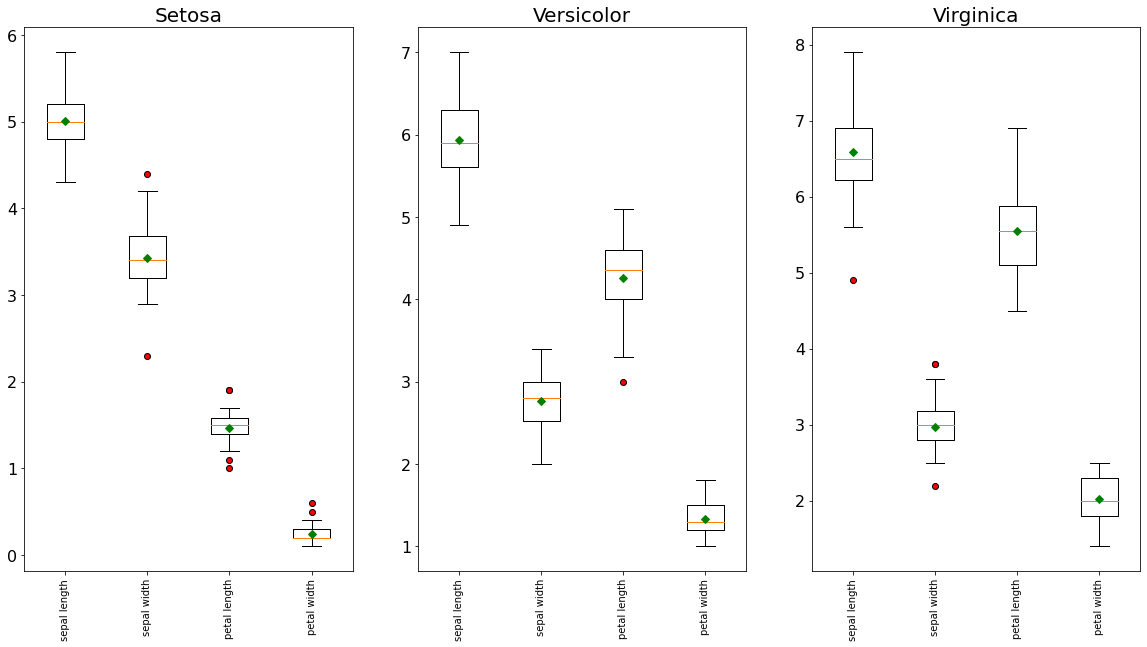

In [168]:
import matplotlib.pyplot as plt

# Transformando as amostras em dataframe
df1 = pd.DataFrame(x_amostras[0:50], columns=[dataset.feature_names])
df2 = pd.DataFrame(x_amostras[50:100], columns=[dataset.feature_names])
df3 = pd.DataFrame(x_amostras[100:150], columns=[dataset.feature_names])

# Visualizando estatística das features por espécie com boxplot
red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict (markerfacecolor = 'green', marker = 'D', markeredgecolor = 'green')

plt.rcParams['axes.facecolor'] = 'w'
plt.rcParams['axes.edgecolor'] = 'k'

fig, axs = plt.subplots(1, 3, figsize=(20,10))
for i, ax in enumerate(axs.flat):
    if i == 0:
        ax.boxplot(df1, labels=['sepal length','sepal width','petal length','petal width'], flierprops=red_circle, showmeans = True, meanprops=mean_shape)
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title('Setosa', fontsize=20)
        ax.tick_params(axis='y', labelsize=16)  
    elif i == 1:
        ax.boxplot(df2, labels=['sepal length','sepal width','petal length','petal width'], flierprops=red_circle, showmeans = True, meanprops=mean_shape)
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title('Versicolor', fontsize=20)
        ax.tick_params(axis='y', labelsize=16)
    else:
        ax.boxplot(df3, labels=['sepal length','sepal width','petal length','petal width'], flierprops=red_circle, showmeans = True, meanprops=mean_shape)
        ax.xaxis.set_tick_params(rotation=90)
        ax.set_title('Virginica', fontsize=20)
        ax.tick_params(axis='y', labelsize=16)

<p align='justify' style="font-size:160%;">
Para entendermos melhor como as variáveis do nosso dataset se relecionam temos a matriz de correlação abaixo apresentada no formato de heatmap nos fazendo enxergar seus coeficientes de correlação no modelo de Pearson (-1, indicando uma correlação negativa perfeita, e +1, indicando uma correlação positiva perfeita) mostrando um relacionamento linear entre as variáveis. Daí, podemos analisar melhor e identificar quais as features mais importantes que podem ser adotadas pelo nosso modelo, como, para este experimento, o comprimento e a largura das pétalas das espécies. No entando, este estudo se propõe a tratar dois casos experimentais onde no primeiro trabalharemos com todas as quatro caracteríticas das flores e no segundo caso trabalharemos com apenas as duas mais relevantes.
</p>

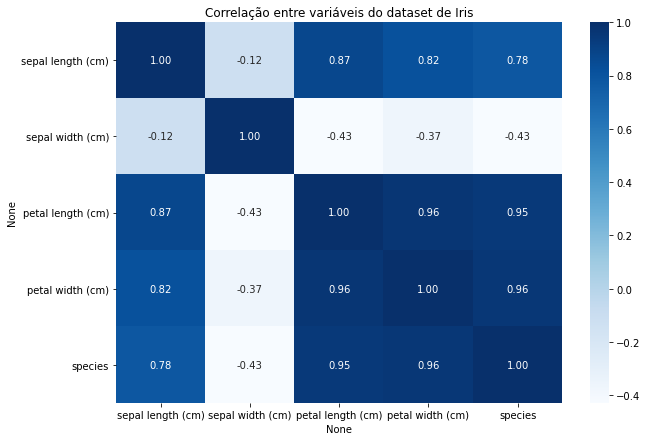

In [169]:
import seaborn as sns

df_corr = pd.DataFrame(x_amostras, columns=[dataset.feature_names])
df_corr['species'] = y_amostras

plt.figure(figsize=(10, 7))
sns.heatmap(df_corr.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Iris')
plt.show()

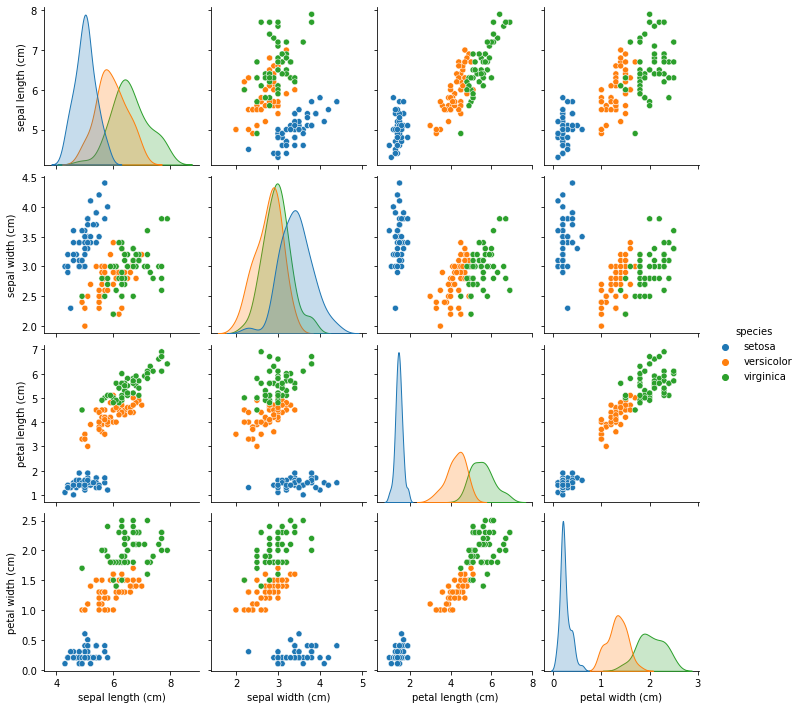

In [170]:
iris_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris_df['species'] = pd.Series(dataset.target).map(dict(zip(range(3),dataset.target_names)))

g = sns.pairplot(iris_df, hue='species')

# Rede neural
<p align='justify' style="font-size:160%;">
O uso de redes neurais profundas para classificação de dados está cada vez mais crescendo no mundo da ciência de dados, e atualmente encontramos modelos para previsão que alcançam um nível de sucesso excelente nos treinamentos e testes. No entanto, esses modelos são dependentes do ajuste de alguns valores de parâmetros (hiperparâmetros) para controlar o processo de treinamento do modelo, dependendo algumas vezes de especialistas para determinar tais valores ao longo do processo que resultarão em modelos que trarão previsões mais acertivas.
Neste estudo uma rede percepetron de três camadas (uma camada de entrada, uma camada oculta e uma camada de saída) foi criada, onde na camada de entrada temos a possibilidade de se trabalhar com as 4 features, pelo fato do dataset apresentar quatro características das espécies de Iris, no entanto, faremos uso das features conforme os dois casos já mencionados (comprimento e largura das sépalas e das pétalas para o caso 1 e somente o comprimento e largura das pétalas para o caso 2), além de uma camada oculta com 20 neurônios (escolha arbitrária), com 3 saídas, para indicar as 3 espécies de flores.</p>

<p align='justify' style="font-size:160%;">
Como passo de criação, primeiramente foi criado um método para propagação direta (feedforward) de cada uma das partículas do PSO na rede, que serão inicializadas com valores aleatórios pequenos uniformemente distribuídos e evoluídos com a utilização do módulo PySwarms, que a partir de um conjunto de soluções candidatas (fitness) procura encontrar a melhor solução atualizando a velocidade e a posição de partículas com movimentações durante a execução da várias épocas influenciadas pela partícula de melhor desempenho em um espaço de busca. Seguido pela criação do método de ativação dos neurônios das camadas oculta e de saída usando a função sigmoid para calcular os valores (nets) de cada neurônio, finalizando a saída com uma probalidade preditiva de classificação (erro) através da função softmax. Repetindo o processo após os ajustes das particulas pela função "pyswarms.single.global_best" do PySwarms que recebe a execução desses processos da rede neural como função objetivo.
</p>

In [171]:
import numpy as np

def ativacao(p):
    n_p1 = n_entrada * n_oculta
    n_b1 = n_oculta
    n_p2 = n_oculta * n_saida
    n_b2 = n_saida

    # Estrutura dos vetores de pesos e bias a partir da lista de parâmetros
    W1 = p[0:n_p1].reshape((n_entrada,n_oculta))                 # pesos oculta-entrada
    b1 = p[n_p1:n_p1+n_b1].reshape((n_oculta,))                  # bias oculta-entrada
    W2 = p[n_p1+n_b1:n_p1+n_b1+n_p2].reshape((n_oculta,n_saida)) # pesos saída-oculta
    b2 = p[n_p1+n_b1+n_p2:].reshape((n_saida,))                  # bias saída-oculta

    # Ativando camada oculta pela função de ativação sigmoid
    z1 = entradas.dot(W1) + b1      # nets da camada oculta
    a1 = np.tanh(z1)                # ativação da camada oculta
    y_obtido = a1.dot(W2) + b2      # nets da camada de saída
    return y_obtido                 # saídas da rede neural

# Propagação direta da rede neural
def propagacao(particula):
    y_obtido = ativacao(particula)
    n_amostras = entradas.shape[0]

    # Probabilidade preditiva de classificação pela função softmax
    exp_scores = np.exp(y_obtido)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Calcula o erro da saída de rede
    corect_logprobs = -np.log(probs[range(n_amostras), saidas]) # erro por saída
    erro = np.sum(corect_logprobs) / n_amostras                 # erro médio total

    return erro

def funcao_obj(enxame):
    n_particulas = enxame.shape[0]
    enxame = [propagacao(enxame[i]) for i in range(n_particulas)]
    return np.array(enxame)

<p align='justify' style="font-size:160%;">
O PySwarms é um kit de ferramentas de pesquisa extensível para otimização de enxame de partículas em Python com uma implementação de alto nível destinado à pesquisadores da área de ciência de dados que atuam com inteligência de enxames. Com o auxílio deste módulo foi possível otimizar os valores dos parâmetros desejados para nossa rede neural profunda, sendo que para cada momente de otimição (época de evolução com o PSO) os valores foram trabalhados de forma conjunta dentro de um vetor, ou seja, reunindo todos os valores de peso e limiar que representaram uma partícula com 163 dimensões para o caso experimental 1 e 123 dimensões para o caso experimental 2, onde ao todo adotou-se 100 partículas em cada enxame, com cada partícula representando uma rede neural candidata ao objetivo deste projeto com seus próprios valores de peso e limiar. Então, dada a estrutura da rede mencionada anteriormente cada partícula foi organizada por uma matriz bidimencional preenchida com os pesos de cada entrada da rede em relação aos neurônios da camada oculta, somado aos valores de limiar de ativação da camada oculta, somado à ponderação de cada neurônio da camada oculta em relação à camada de saída finalizando com o acréscimo do limiar de ativação da camada de saída, nos remetendo ao total de valores que formarão cada partícula do enxame.
</p>

# Casos Experimentais

<p align='justify' style="font-size:160%;">
Para este projeto, além dos valores de quantidade e dimensão de partículas já mencionados outros valores de parâmetros necessários para execução do algoritmo de PSO durante o treinamento da nossa rede neural foram definidos como exigência da aplicação da biblioteca PySwarms, como fatores de aceleração cognitivo (c1 = 0.5) e social (c2 = 0.3) e peso de inércia (w = 0.9), para que ao final da execução de todas as épocas viéssemos receber como retorno o valor de melhor custo (fitness) global e os valores da partícula de melhor posição global.
</p>

# Caso 1

In [172]:
import pyswarms as ps

# CASO 1 - Definição da arquiteura da rede neural
n_entrada = 4                # número de entradas na camada de entrada
n_oculta = 20                # número de neurônios na camada oculta
n_saida = 3                  # número de classes na camada de saídas

# Definindo estrutura do PSO
parametrosPSO = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
dimensoes = (n_entrada * n_oculta) + (n_oculta * n_saida) + n_oculta + n_saida
n_particulas = 100
n_epocas = 1000
entradas = x_treino
saidas = y_treino

# Iniciando PSO
otimizacao = ps.single.GlobalBestPSO(n_particles=n_particulas, dimensions=dimensoes, options=parametrosPSO)

# Realizando treinamento/otimização
custo, posicao = otimizacao.optimize(funcao_obj, iters=n_epocas, verbose=False)

In [173]:
# Resultados do treinamento - melhor custo global
df_custo = pd.DataFrame([[n_epocas, custo]], columns=['Quantidade de épocas','Valor ótimo de minização'], index=[''])
display(df_custo)

,Quantidade de épocas,Valor ótimo de minização
,1000,2.407058e-09


In [174]:
# Resultado do treinamento - melhor posição/particula global
n_p1 = n_entrada * n_oculta
n_b1 = n_oculta
n_p2 = n_oculta * n_saida
n_b2 = n_saida

df = pd.DataFrame(posicao[:n_p1], columns=['Pesos 1'])
df['Bias 1'] = pd.Series(posicao[n_p1:n_p1+n_b1])
df['Pesos 2'] = pd.Series(posicao[n_p1+n_b1:n_p1+n_b1+n_p2])
df['Bias 2'] = pd.Series(posicao[n_p1+n_b1+n_p2:])
df.fillna('', inplace=True)
df.index = np.arange(1, len(df)+1)
pd.set_option("display.max_columns", None)
display(df.transpose())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
Pesos 1,0.344054,-0.288987,-2.142487,0.506269,3.830987,0.289884,4.625894,2.171926,-2.034603,-0.647699,7.564211,0.077742,0.343077,0.385717,-0.108057,1.13222,1.254616,0.813751,-1.084401,-0.132502,-1.846922,-2.748265,-1.783753,0.1283,-0.39708,0.834399,0.318778,1.413649,-0.686466,0.872085,1.141146,-0.938652,-1.499783,-3.964445,0.046975,0.188567,-2.424622,-1.023577,-1.49183,0.601064,-0.597206,-0.147522,0.096503,0.580688,0.204514,-0.61572,3.465512,0.751369,-1.072454,-0.45793,-0.23626,0.33502,1.105444,-4.582683,-0.940297,-1.617786,-0.533807,-0.914397,2.211412,-0.132544,-1.118244,-12.112366,-0.052744,-1.379176,-13.744142,-2.237598,-30.640803,-1.684269,-0.70079,0.931666,-2.283959,-0.805024,0.410552,1.375026,1.942779,-1.334534,-0.774203,0.574514,-0.127457,-2.2027
Bias 1,0.910879,-0.492327,-0.196731,-0.714149,-0.265506,-0.348661,0.403958,-1.307454,0.901719,1.188104,0.323938,-0.298525,-0.112331,-3.951748,0.097088,-0.212853,1.683539,-0.65631,0.042119,-1.731833,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Pesos 2,2.260283,1.431589,1.777254,-0.156686,-0.352888,-1.366085,-0.415166,1.749828,-1.145225,0.24854,-0.821974,-0.432436,0.296633,1.501927,-99.605697,3.087997,1.171763,-0.11324,0.052352,-53.936507,0.789995,-0.644631,-0.217095,1.641944,0.769697,0.935358,1.580334,-0.921135,-0.465009,-56.6769,-0.263089,-0.392735,0.584554,-6.751095,-1.579721,0.082308,-81.33336,4.014811,-0.202289,0.821177,0.612858,0.066764,3.156298,1.71992,-0.366977,5.393268,0.121311,-0.414274,0.351276,1.870706,0.172545,-0.684332,0.54908,0.38169,-2.700478,-86.738164,1.214036,0.11938,0.765364,1.272623,,,,,,,,,,,,,,,,,,,,
Bias 2,0.516359,0.421318,0.427911,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [175]:
# Método de calculo da acurácia
def avaliacao(posicao):
    y_obtido = ativacao(posicao)
    resultado = np.argmax(y_obtido, axis=1)
    return resultado

result_treino = avaliacao(posicao)

# Acurácia do treino
acc_treino = np.mean(result_treino == y_treino) * 100

# Guardando dados de entrada e as saídas desejadas para cada amostra de teste
entradas = x_teste
saidas = y_teste

# Acurácia do teste
result_teste = avaliacao(posicao)
acc_teste = np.mean(result_teste == saidas) * 100

df_acc = pd.DataFrame([[acc_treino, acc_teste]], columns=['Acurácia de treino','Acurácia de teste'], index=[''])
display(df_acc)

,Acurácia de treino,Acurácia de teste
,100.0,91.111111


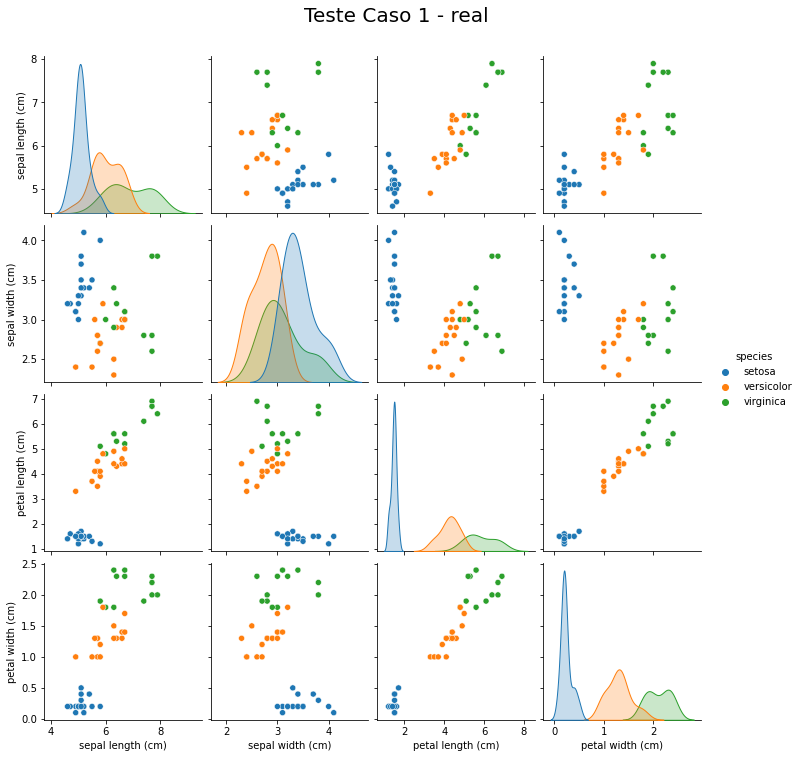

In [176]:
df_caso1_teste = pd.DataFrame(x_teste, columns=dataset.feature_names)
df_caso1_teste['species'] = pd.Series(y_teste).map(dict(zip(range(3),dataset.target_names)))

g1 = sns.pairplot(df_caso1_teste, hue='species')
t = g1.fig.suptitle('Teste Caso 1 - real', fontsize=20, y=1.05)

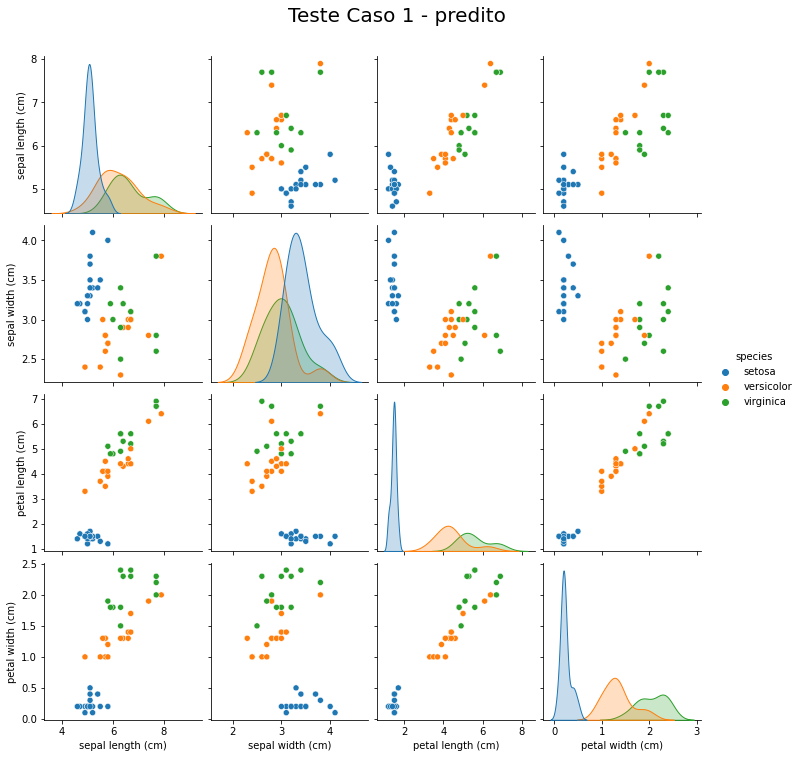

In [177]:
df_caso1_teste = pd.DataFrame(x_teste, columns=dataset.feature_names)
df_caso1_teste['species'] = pd.Series(result_teste).map(dict(zip(range(3),dataset.target_names)))

g2 = sns.pairplot(df_caso1_teste, hue='species')
t = g2.fig.suptitle('Teste Caso 1 - predito', fontsize=20, y=1.05)

# Caso 2

In [178]:
import pyswarms as ps

# CASO 2 - Definição da arquiteura da rede neural
n_entrada = 2                # número de entradas na camada de entrada
n_oculta = 20                # número de neurônios na camada oculta
n_saida = 3                  # número de classes na camada de saídas

# Definindo estrutura do PSO
parametrosPSO = {'c1': 0.5, 'c2': 0.3, 'w':0.9}
dimensoes = (n_entrada * n_oculta) + (n_oculta * n_saida) + n_oculta + n_saida
n_particulas = 100
n_epocas = 1000
entradas = []
entradas = x_treino[:,2:]
saidas = y_treino

# Iniciando PSO
otimizacao = ps.single.GlobalBestPSO(n_particles=n_particulas, dimensions=dimensoes, options=parametrosPSO)

# Realizando treinamento/otimização
custo, posicao = otimizacao.optimize(funcao_obj, iters=n_epocas, verbose=False)

In [179]:
# Resultados do treinamento - melhor custo global
df_custo = pd.DataFrame([[n_epocas, custo]], columns=['Quantidade de épocas','Valor ótimo de minização'], index=[''])
display(df_custo)

,Quantidade de épocas,Valor ótimo de minização
,1000,0.01595


In [180]:
# Resultado do treinamento - melhor posição/particula global
n_p1 = n_entrada * n_oculta
n_b1 = n_oculta
n_p2 = n_oculta * n_saida
n_b2 = n_saida

df = pd.DataFrame(posicao[:n_p1], columns=['Pesos 1'])
df['Bias 1'] = pd.Series(posicao[n_p1:n_p1+n_b1])
df['Pesos 2'] = pd.Series(posicao[n_p1+n_b1:n_p1+n_b1+n_p2])
df['Bias 2'] = pd.Series(posicao[n_p1+n_b1+n_p2:])
df.fillna('', inplace=True)
df.index = np.arange(1, len(df)+1)
pd.set_option("display.max_columns", None)
display(df.transpose())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Pesos 1,-1.83598,1.703518,0.27195,0.509174,-2.806285,-0.612859,0.58811,0.292815,-0.612351,1.707202,0.746878,0.516592,-2.634644,2.294178,1.495898,0.828964,0.187002,1.998859,0.747319,2.07804,4.165211,1.265825,1.607069,-0.559439,-0.169086,0.473595,2.023759,-3.523812,1.475853,1.139522,5.841035,0.345261,3.415379,-1.700756,0.008086,0.01545,3.435535,-5.928916,-2.295485,-0.166915
Bias 1,2.864148,-0.847214,0.409806,1.283285,-0.793658,-0.45391,-3.740378,5.681238,1.572247,0.77132,-1.614213,1.523577,-2.614034,0.859564,-2.678085,-2.205961,3.673103,1.901709,-0.166439,0.698973,,,,,,,,,,,,,,,,,,,,
Pesos 2,-0.368196,0.258563,-64.931093,-5.16621,-0.146178,0.839078,-0.264748,1.262018,1.023701,5.137253,0.715382,14.956707,0.093522,-0.168623,4.376199,3.491807,1.298182,1.083019,-2.895682,-1.098858,3.175519,2.050024,3.127024,-1.601601,5.925331,0.262732,-0.504279,-1.189193,-0.767428,0.876735,1.175455,1.79688,0.36111,1.561912,-1.94451,4.598997,0.007896,-0.476981,2.744179,3.815711
Bias 2,5.731371,3.319068,-3.062012,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [181]:
# Método de calculo da acurácia
def avaliacao(posicao):
    y_obtido = ativacao(posicao)
    resultado = np.argmax(y_obtido, axis=1)
    return resultado

result_treino = avaliacao(posicao)

# Acurácia do treino
acc_treino = np.mean(result_treino == y_treino) * 100

# Guardando dados de entrada e as saídas desejadas para cada amostra de teste
entradas = x_teste[:,2:]
saidas = y_teste

# Acurácia do teste
result_teste = avaliacao(posicao)
acc_teste = np.mean(result_teste == saidas) * 100

df_acc = pd.DataFrame([[acc_treino, acc_teste]], columns=['Acurácia de treino','Acurácia de teste'], index=[''])
display(df_acc)

,Acurácia de treino,Acurácia de teste
,99.047619,97.777778


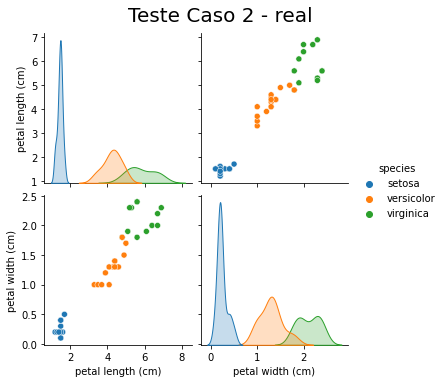

In [183]:
df_caso2_teste = pd.DataFrame(entradas, columns=[dataset.feature_names[2],dataset.feature_names[3]])
df_caso2_teste['species'] = pd.Series(y_teste).map(dict(zip(range(3),dataset.target_names)))

g2 = sns.pairplot(df_caso2_teste, hue='species')
t = g2.fig.suptitle('Teste Caso 2 - real', fontsize=20, y=1.05)

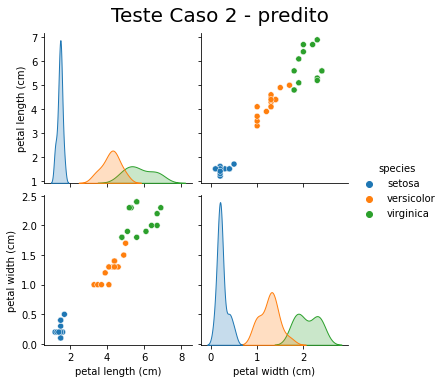

In [184]:
df_caso2_teste = pd.DataFrame(entradas, columns=[dataset.feature_names[2],dataset.feature_names[3]])
df_caso2_teste['species'] = pd.Series(result_teste).map(dict(zip(range(3),dataset.target_names)))

g2 = sns.pairplot(df_caso2_teste, hue='species')
t = g2.fig.suptitle('Teste Caso 2 - predito', fontsize=20, y=1.05)

<p align='justify' style="font-size:160%;">
Após a análise do resultados dos experimentos pelo valor da acurácia que a rede apresentou usando os valores otimizados dos parâmetros e pela comparação das matrizes de correlação da classificação real e da classificação automatizada pela rede das amostras de teste, podemos concluir que a otimização por enxame de partículas se apresenta como uma boa metodologia de aplicação para automação do processo de seleção de valores de parâmetros peso e limiar de ativação de uma rede neural profunda atingindo um valor maior que 90% de probabilidade de resultados acertivos, levando em consideração o uso de um conjunto de dados relativamente pequeno. Mas, que por outro lado, o uso somente de features que sejam promissoras podem levar ao aumento do processo de classificação da mesma rede, como ocorreu no caso experimental 2 que apresentou uma acurácia maior em relação aos resultados do caso experimental 2.
</p>